### Import Dependencies

In [5]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [11]:
# Importing functions from the modules in the qseg package
from qseg.graph_utils import image_to_grid_graph, draw, draw_graph_cut_edges
from qseg.dwave_utils import dwave_solver, annealer_solver
from qseg.utils import decode_binary_string

# Additional necessary imports
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite


### Create a sample Image

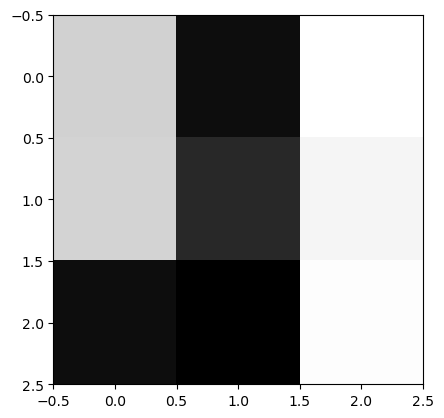

In [12]:
height,width = 3,3

image = np.array([
       [0.82,  0.1, 0.99],
       [0.83,  0.2, 0.95],
       [0.1,  0.05, 0.98]
       ])
plt.imshow(image, cmap=plt.cm.gray)

### Convert Image to Graph

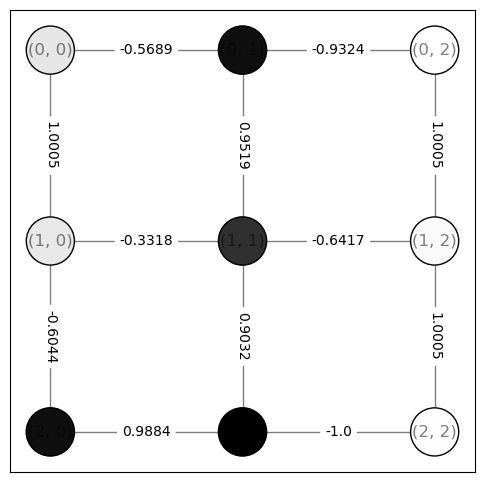

In [13]:
normalized_nx_elist = image_to_grid_graph(image)  # We are using Guassian similarity metric as the edge weight metric
G = nx.grid_2d_graph(image.shape[0], image.shape[1])
G.add_weighted_edges_from(normalized_nx_elist)
draw(G, image)

### Solve using D-Wave annealer

In [25]:
import time
import dimod
from dimod import ExactSolver
start_time = time.time()

# Convert graph to binary quadratic model (BQM)
bqm = dimod.BinaryQuadraticModel.empty(dimod.BINARY)
for u, v, d in G.edges(data=True):
    bqm.add_interaction(u, v, d['weight'])
#sample = ExactSolver()
#sampleset = sampler.sample(G)
#samples_dataframe, execution_info_dict = annealer_solver(G, private_token = 'DEV-888669d8bb4a1767cd47903b980ab42152f65e52')
import dwave.samplers
from dwave.samplers import SimulatedAnnealingSampler

sampler = SimulatedAnnealingSampler()
start_time = time.time()
sampleset = sampler.sample(bqm, num_reads=1000)
total_time = time.time() - start_time


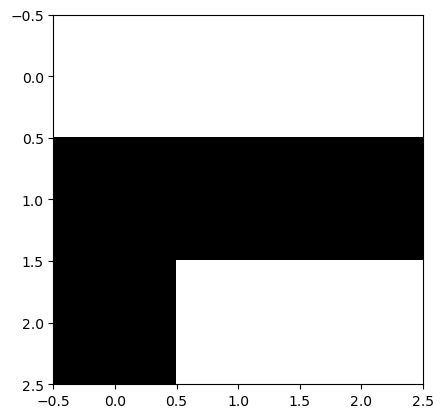

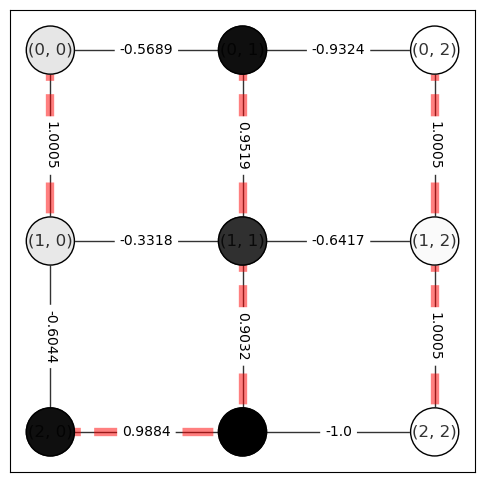

In [26]:
# Extract solution
#solution_binary_string = sampleset.first.sample
solution_binary_string = [int(sampleset.first.sample[node]) for node in G.nodes]

segmentation_mask = decode_binary_string(solution_binary_string, height, width)
plt.imshow(segmentation_mask, cmap=plt.cm.gray)

cut_edges = [(u, v) for (u, v, d) in G.edges(data=True) if segmentation_mask[u] != segmentation_mask[v]]
draw_graph_cut_edges(G, image, cut_edges)

### All samples received

In [18]:
samples_dataframe

### Decode binary solution string to a binary segmentation mask

In [19]:
solution_binary_string = samples_dataframe.iloc[0][:-3]
segmentation_mask = decode_binary_string(solution_binary_string, height, width)
plt.imshow(segmentation_mask, cmap=plt.cm.gray)

AttributeError: 'SimulatedAnnealingSampler' object has no attribute 'iloc'

In [8]:
cut_edges = [(u, v) for (u, v, d) in G.edges(data=True) if segmentation_mask[u]!=segmentation_mask[v]]
cut_edges

NameError: name 'segmentation_mask' is not defined

In [9]:
draw_graph_cut_edges(G, image, cut_edges)

NameError: name 'cut_edges' is not defined